In [1]:
import numpy as np
import matplotlib.pyplot as plt


def CFFT(AR, AI, M, ISIGN):
    """连续傅里叶变换
    """
    A = get_Fk(AR + 1j*AI, ISIGN)
    if ISIGN == -1:
        A /= 2**M  # 逆变换时差了一个常数
    return np.real(A), np.imag(A)


def get_Fk(A, ISIGN):
    """递归计算傅里叶变换
    """
    if len(A) == 1:
        return A
    else:
        # 将傅里叶变换后的 F_k 分解成 Fk_e 和 Fk_o
        # Fk_e = Fk_e + W*Fk_o
        # Fk_o = Fk_e - W*Fk_o
        Fk_even = get_Fk(A[::2], ISIGN)
        Fk_odd = get_Fk(A[1::2], ISIGN)
        W = np.exp(-ISIGN*1j*np.pi/len(Fk_odd)*np.arange(len(Fk_odd)))
        return np.concatenate((Fk_even + W*Fk_odd, Fk_even - W*Fk_odd))

/home/zm/.conda/envs/CP/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


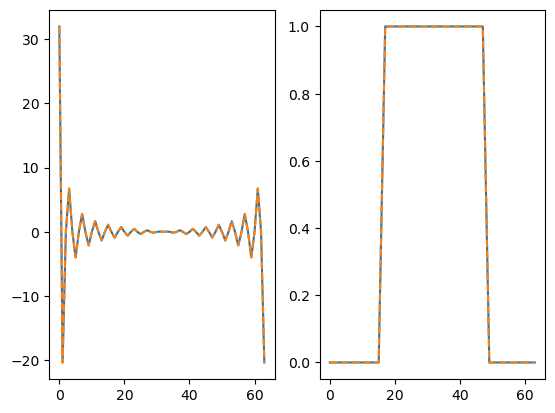

In [2]:
M = 6
AR = np.zeros(2**M)
AR[2**(M-2):2**M-2**(M-2)] = 1  # 实部是一个 rect 函数
AI = np.zeros(2**M)  # 虚部为 0

FFT_AR, _ = CFFT(AR, AI, M, ISIGN=1)  # 作傅里叶变换应得到 sinc 函数
IFFT_FFT_AR, _ = CFFT(FFT_AR, AI, M, ISIGN=-1)  # 作逆变换返回原来的 rect 函数

fig = plt.figure()
ax1, ax2 = fig.subplots(1, 2)
ax1.plot(FFT_AR)
ax1.plot(np.fft.fft(AR), '--')  # 与 numpy 自带的 fft 作比较
ax2.plot(IFFT_FFT_AR)
ax2.plot(np.fft.ifft(FFT_AR), '--')  # 逆变换, 与 numpy 自带的 fft 作比较
plt.show()

In [3]:
for z in [1, 10, 100]:
    M = 10
    N = 2**M
    AR = np.cos(z*np.cos(2*np.pi*np.arange(N)/N))  # 实部
    AI = np.sin(z*np.cos(2*np.pi*np.arange(N)/N))  # 虚部

    FFT_AR, FFT_AI = CFFT(AR, AI, M=M, ISIGN=1)  # 作傅里叶变换
    Jn = FFT_AR * 1j**np.arange(N)/N + FFT_AI * 1j**np.arange(-1, N-1, 1)/N  # 乘上系数

    print(Jn[:10].real)  # 输出前 10 项

[7.65197687e-01 4.40050586e-01 1.14903485e-01 1.95633540e-02
 2.47663896e-03 2.49757730e-04 2.09383380e-05 1.50232582e-06
 9.42234417e-08 5.24925019e-09]
[-0.24593576  0.04347275  0.25463031  0.05837938 -0.21960269 -0.23406153
 -0.01445884  0.21671092  0.31785413  0.29185569]
[ 0.01998585 -0.07714535 -0.02152876  0.0762842   0.02610581 -0.07419574
 -0.03352538  0.07017269  0.04334956 -0.06323676]
